In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
seed = 1
np.random.seed(seed)
torch.manual_seed(seed)
# create 100 examples with some noise
x = np.linspace(0, 10, 100)
y = (2*x-5) + np.random.normal(0,1, size=len(x))
x = x.reshape(-1,1)
x.shape, y.shape

((100, 1), (100,))

Red line represents ground truth: $f(x)=2x-5$
In blue, some training examples (function f with some noise)

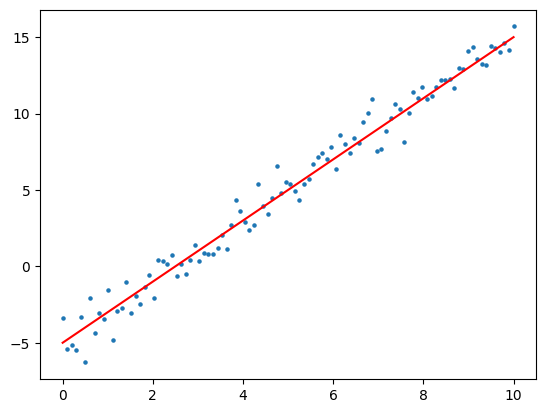

In [3]:
plt.plot(x,2*x-5, 'r')
plt.scatter(x,y, s=5)
plt.show()

In [4]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        layer1 = nn.Linear(1,1)
        # pass-through activation function
        activation1 = nn.Identity()
        self.layers = nn.ModuleList([layer1,activation1])

    def forward(self, x):
        for f in self.layers:
            x = f(x)
        return x

In [5]:
X = torch.from_numpy(x).float()
Y = torch.from_numpy(y.reshape(-1,1)).float()
X.shape, Y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

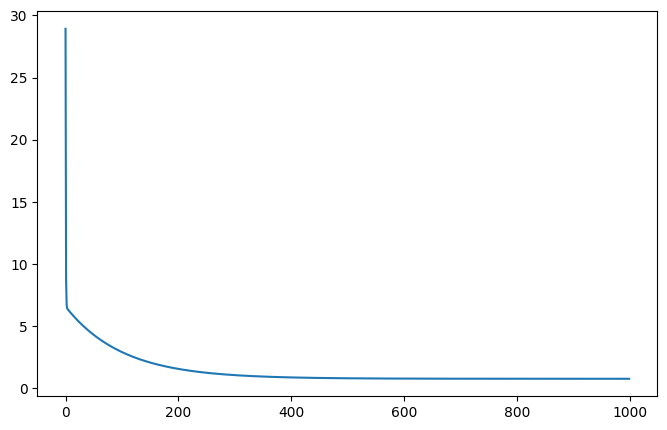

In [6]:
# neural network in its simplest form (1 layer, 1 neuron, 1 input and no activation function)
model = MyModel()
loss_fn = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)

    # Compute and save current loss
    loss = loss_fn(y_pred, Y)
    losses.append(loss.item())

    # backward pass
    optim.zero_grad()
    loss.backward()
    optim.step()   

plt.figure(figsize=(8,5))
plt.plot(losses)

$ f(50)=95 $  
Pytorch prediction: 96.33  
sklearn Linear Regression: 96.54

In [7]:
print(model(torch.Tensor([50])))
model.state_dict()

tensor([96.3343], grad_fn=<ViewBackward0>)


OrderedDict([('layers.0.weight', tensor([[2.0281]])),
             ('layers.0.bias', tensor([-5.0718]))])

In [8]:
lr_model = LinearRegression()
lr_model.fit(x,y)
print(lr_model.predict([[50]]))
lr_model.coef_[0], lr_model.intercept_

[96.54938383]


(2.0330844662817498, -5.10483947933305)